## Test of the RINN model on a linear ODE

This notebook is an implementation of the RINN integration scheme given a known linear ODE, it can be used mostly to evaluate the stability of the learnt integration scheme

In [1]:
from generate_data import generate_data
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from RINN_withHopti import RINN_model
from utils import RMSE

In [2]:
# generating training data
class GD:
    model = 'Adv_Dif_1D_Real'
    class parameters:
        w = -0.5
        x0 = 0.5
        t0 = 0
    dt_integration =0.01# integration time
    dt_states = 1 # number of integeration times between consecutive states (for xt and catalog)
    dt_obs = 8# number of integration times between consecutive observations (for yo)
    var_obs = np.array([0]) # indices of the observed variables
    nb_loop_train = 1000.1 # size of the catalog
    nb_loop_test = 100 # size of the true state and noisy observations
    sigma2_catalog = 0.0 # variance of the model error to generate the catalog
    sigma2_obs = 2.0 # variance of the observation error to generate observation
    
# run the data generation
catalog, xt, yo = generate_data(GD)
#AnDA_RMSE(catalog.true_solution,catalog.euler_integration)
#AnDA_RMSE(catalog.true_solution,catalog.num_integration)
#training data
batch_size = catalog.true_solution[:-10-1,:].shape[0]
X_train = np.reshape(catalog.true_solution[:-10-1,:],(int(catalog.true_solution[1:-10,:].shape[0]/batch_size),batch_size,catalog.true_solution[1:-10,:].shape[1]))
Grad_t  = np.reshape(np.gradient(catalog.true_solution[:-10-1,0])/GD.dt_integration,(X_train.shape))
Y_train = np.reshape(catalog.true_solution[1:-10,:],(int(catalog.true_solution[1:-10,:].shape[0]/batch_size),batch_size,catalog.true_solution[1:-10,:].shape[1]))

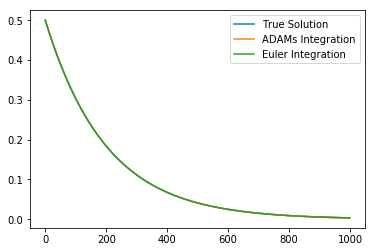

In [3]:
plt.plot(catalog.true_solution[:1000],label = 'True Solution')
plt.plot(catalog.num_integration[:1000],label = 'ADAMs Integration')
plt.plot(catalog.euler_integration[:1000],label = 'Euler Integration')
plt.legend()

In [4]:
X_train.shape

(1, 100000, 1)

In [5]:
#NN parameters 
params = {}
params['lin_coef']= GD.parameters.w
params['dim_input']=1
params['dim_output']=1
params['dim_observations']=1
params['dt_integration']=GD.dt_integration
params['ntrain']=[0,200,0]
pretrained = False
path = None#'Lin_w=-05.pt'
order=6#number of stages of the runge kutta scheme

# learning the 6 stages RK integration scheme

In [6]:
# training RINN model
dyn_mdl, dyn_mdl2, loss_hist, model_hopt = RINN_model(X_train[:,:,:], Y_train[:,:,:], Grad_t[:,:,:], params, order, pretrained ,path)

Learning dynamical model
Learning prediction model
0 tensor(0.0030, dtype=torch.float64, grad_fn=<MseLossBackward>)
1 tensor(5.6869e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
2 tensor(5.8018e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
3 tensor(5.8840e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)


/data/home/AI4OAC-VM1/notebooks/AI4OAC/RINN/RINN_withHopti.py:142: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(modelRINN.parameters(),5)


4 tensor(5.9469e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
5 tensor(5.9967e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
6 tensor(6.0368e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
7 tensor(6.0695e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
8 tensor(6.0964e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
9 tensor(6.1185e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
10 tensor(6.1368e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
11 tensor(6.1520e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
12 tensor(6.1646e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
13 tensor(6.1750e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
14 tensor(6.1837e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
15 tensor(6.1909e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
16 tensor(6.1968e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
17 tensor(6.2017e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
18 tensor(6.2058e-11, dtyp

126 tensor(6.2123e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
127 tensor(6.2121e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
128 tensor(6.2119e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
129 tensor(6.2118e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
130 tensor(6.2116e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
131 tensor(6.2114e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
132 tensor(6.2112e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
133 tensor(6.2111e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
134 tensor(6.2109e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
135 tensor(6.2107e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
136 tensor(6.2105e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
137 tensor(6.2104e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
138 tensor(6.2102e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
139 tensor(6.2100e-11, dtype=torch.float64, grad_fn=<MseLossBackward>)
140 te

# Test on a different integration timestep dt = 2

In [7]:
#forecasting 
y_pred=np.zeros((1000,1))
y_pred[0,:] = 0.5
tmp = np.reshape(0.5,(1,1))
tmp = Variable(torch.from_numpy(tmp).double())
y_pred = Variable(torch.from_numpy(y_pred).double())

test_dt = 2
for i in range(1,1000):
    y_pred[i,:] = dyn_mdl2(y_pred[i-1,:],test_dt,order)[0]#.data.numpy()

0.00019297092425159642
0.014529436813796096


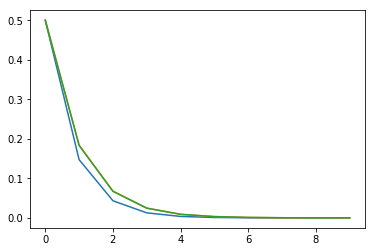

In [8]:
dt_ratio = int(test_dt/GD.dt_integration)
length_pred = 10
plt.plot(y_pred.data.numpy()[:length_pred])
plt.plot(catalog.true_solution[:length_pred*dt_ratio][::dt_ratio])
plt.plot(catalog.euler_integration[:length_pred*dt_ratio][::dt_ratio])

print(RMSE(catalog.true_solution[:length_pred*dt_ratio][::dt_ratio],catalog.euler_integration[:length_pred*dt_ratio][::dt_ratio]))
print(RMSE(catalog.true_solution[:length_pred*dt_ratio][::dt_ratio],y_pred.data.numpy()[:length_pred]))

# Stability analysis of the integration scheme with respect to Euler and RK4 schemes : 

We need first to write the integration scheme as $x_{t+1} = G(h) x{t}$ where $G$ is the gain matrix (here scalar since we are working in 1D).

if G<1  : the integration scheme is stable 
if G=>1 : the integration scheme is unstable
G = 1 when the integration time step = 0

In [9]:
#extracting integration scheme params
a=dyn_mdl2.a.data.numpy()
b=dyn_mdl2.b.data.numpy()
c=dyn_mdl2.c.data.numpy()

import sympy as sp
xt, h = sp.symbols('xt h')

In [10]:
# computing analytic form of the integration scheme
k = [(dyn_mdl2.Dyn_net.forward(xt))]
for i in range(1,order):
    coef_sum = 0
    for j in range(0,i):
        if j ==0:
            if i == 1:
                coef_sum = coef_sum + k[j]*(c[:,i])
            else:
                coef_sum = coef_sum + k[j]*(c[:,i]-a[:,i,1:i].sum(1))
        else :
            coef_sum = coef_sum + k[j]*a[:,i,j]
    rk_inp = xt+h*coef_sum        
    k.append((dyn_mdl2.Dyn_net.forward(rk_inp)))
#            pred_sum = torch.autograd.Variable(torch.zeros(k[0].size()).double())
pred_sum = 0   
for i in range(0,order): 
    pred_sum = pred_sum+k[i]*b[:,i]
    xt_1 = xt +h*pred_sum
# extracting the gain factor
g = xt_1.factor(xt)/xt

In [11]:
# RK4 analytic integration scheme
grad = dyn_mdl2.Dyn_net.forward(xt)
k1   = dyn_mdl2.Dyn_net.forward(xt)
k2   = dyn_mdl2.Dyn_net.forward(xt+0.5*h*k1)
k3   = dyn_mdl2.Dyn_net.forward(xt+0.5*h*k2)
k4   = dyn_mdl2.Dyn_net.forward(xt+h*k3)            
xt_1RK4 = xt +h*(k1+2*k2+2*k3+k4)/6

gRK4 = xt_1RK4.factor(xt)/xt

In [12]:
# stability graph
hi = np.arange(0,10+0.000001,GD.dt_integration)
gainRK4 = np.zeros_like(hi)
for i in range(len(hi)):
    gainRK4[i] = np.abs(gRK4.evalf(subs={h: hi[i]}))
gainE = np.zeros_like(hi)
for i in range(len(hi)):
    gainE[i] = np.abs(1-0.5*hi[i])
gain = np.zeros_like(hi)
for i in range(len(hi)):
    gain[i] = np.abs(g.evalf(subs={h: hi[i]}))

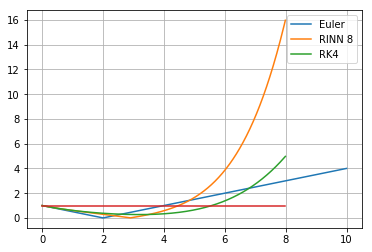

In [13]:
length_h = 800

plt.plot(hi[:],gainE[:],label = 'Euler')
plt.plot(hi[:length_h],gain[:length_h],label = 'RINN 8')
plt.plot(hi[:length_h],gainRK4[:length_h],label = 'RK4')
plt.plot(hi[:length_h],np.ones_like(gainRK4[:length_h]))
#plt.plot(hi[:600],np.abs(ff[-1].data.numpy()[:600]))
plt.grid()
plt.legend()

In [14]:
dyn_mdl2.b.sum() # RK constraint respected :)

tensor(1., dtype=torch.float64, grad_fn=<SumBackward0>)

# Analytical expression of the gain G(h) as a 8 th order polynomial 

In [15]:
g

1.1356582839362e-5*h**6 - 0.00117499694902036*h**5 + 0.00921012814759504*h**4 - 0.0474663168659302*h**3 + 0.140971373773926*h**2 - 0.5*h + 1.0

# Optimization of the integration scheme to be stable in a given integration timestep range

In [16]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

class Gain(torch.nn.Module):
    def __init__(self):
        super(Gain, self).__init__()
        self.Pred_net_RINN = dyn_mdl2

    def forward(self, h_int, inp, order):
        gain = Variable(torch.zeros(h_int.size()).double())
        for i in range(h_int.shape[0]):
            pred ,tmp, tmpp =self.Pred_net_RINN(inp, h_int[i], order)
            gain[i] = tmpp[-1,0]
            del pred, tmp, tmpp
        return gain

model_int = Gain()

In [17]:
def customized_loss(x, y):
        gain_to_zero = ((x-y+0.2))**2
        return torch.mean(gain_to_zero)

In [18]:
x = Variable(torch.from_numpy(X_train).double())
y = Variable(torch.from_numpy(Y_train).double())
z = Variable(torch.from_numpy(Grad_t).double())
hi = np.arange(0,6+0.000001,0.1)
h_int = Variable(torch.from_numpy(hi).double())
gain_true = Variable(torch.from_numpy(np.ones_like(h_int)).double())

In [19]:
params['ntrain'][2] = 100
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_int.parameters(), lr = 0.1)   
loss_hist = []        
print ('optim integration model')
for t in range(params['ntrain'][2]):
    for b in range(x.shape[0]):
        # Forward pass: Compute predicted gradients by passing x to the model
        gain_op = model_int(h_int, x[b,:,:],order)
        # Compute and print loss
        loss = customized_loss((gain_op), gain_true)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        print(t,loss)

optim integration model
0 tensor(3.0348, dtype=torch.float64, grad_fn=<MeanBackward0>)
1 tensor(0.3660, dtype=torch.float64, grad_fn=<MeanBackward0>)
2 tensor(0.4811, dtype=torch.float64, grad_fn=<MeanBackward0>)
3 tensor(0.1912, dtype=torch.float64, grad_fn=<MeanBackward0>)
4 tensor(0.1663, dtype=torch.float64, grad_fn=<MeanBackward0>)
5 tensor(0.5625, dtype=torch.float64, grad_fn=<MeanBackward0>)
6 tensor(0.5250, dtype=torch.float64, grad_fn=<MeanBackward0>)
7 tensor(0.2420, dtype=torch.float64, grad_fn=<MeanBackward0>)
8 tensor(0.2997, dtype=torch.float64, grad_fn=<MeanBackward0>)
9 tensor(0.4844, dtype=torch.float64, grad_fn=<MeanBackward0>)
10 tensor(0.3591, dtype=torch.float64, grad_fn=<MeanBackward0>)
11 tensor(0.2007, dtype=torch.float64, grad_fn=<MeanBackward0>)
12 tensor(0.2314, dtype=torch.float64, grad_fn=<MeanBackward0>)
13 tensor(0.3007, dtype=torch.float64, grad_fn=<MeanBackward0>)
14 tensor(0.2561, dtype=torch.float64, grad_fn=<MeanBackward0>)
15 tensor(0.1513, dtype=to

In [20]:
#forecasting 
y_pred=np.zeros((10000,1))
y_pred[0,:] = 0.5
tmp = np.reshape(0.5,(1,1))
tmp = Variable(torch.from_numpy(tmp).double())
y_pred = Variable(torch.from_numpy(y_pred).double())

test_dt = 5.0
for i in range(1,10000):
    y_pred[i,:] = dyn_mdl2(y_pred[i-1,:],test_dt,order)[0]#.data.numpy()

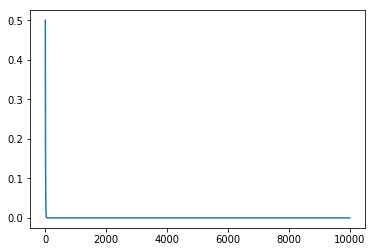

In [21]:
plt.plot(y_pred.data.numpy())

In [22]:
# computing analytic form of the integration scheme
a=dyn_mdl2.a.data.numpy()
b=dyn_mdl2.b.data.numpy()
c=dyn_mdl2.c.data.numpy()
xt, h = sp.symbols('xt h')
k = [(dyn_mdl2.Dyn_net.forward(xt))]
for i in range(1,order):
    coef_sum = 0
    for j in range(0,i):
        if j ==0:
            if i == 1:
                coef_sum = coef_sum + k[j]*(c[:,i])
            else:
                coef_sum = coef_sum + k[j]*(c[:,i]-a[:,i,1:i].sum(1))
        else :
            coef_sum = coef_sum + k[j]*a[:,i,j]
    rk_inp = xt+h*coef_sum        
    k.append((dyn_mdl2.Dyn_net.forward(rk_inp)))
#            pred_sum = torch.autograd.Variable(torch.zeros(k[0].size()).double())
pred_sum = 0   
for i in range(0,order): 
    pred_sum = pred_sum+k[i]*b[:,i]
    xt_1 = xt +h*pred_sum
# extracting the gain factor
g = xt_1.factor(xt)/xt

In [23]:
hi = np.arange(0,10+0.000001,GD.dt_integration)
gain_opti = np.zeros_like(hi)
for i in range(len(hi)):
    gain_opti[i] = np.abs(g.evalf(subs={h: hi[i]}))

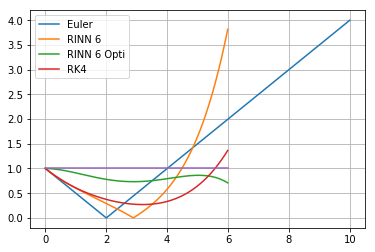

In [24]:
length_h = 600

plt.plot(hi[:],gainE[:],label = 'Euler')
plt.plot(hi[:length_h],gain[:length_h],label = 'RINN 6')
plt.plot(hi[:length_h],gain_opti[:length_h],label = 'RINN 6 Opti')
plt.plot(hi[:length_h],gainRK4[:length_h],label = 'RK4')
plt.plot(hi[:length_h],np.ones_like(gainRK4[:length_h]))
plt.grid()
plt.legend()

In [25]:
dyn_mdl2.b.sum() # RK constraint not respected :/

tensor(0.0084, dtype=torch.float64, grad_fn=<SumBackward0>)

In [26]:
g

-5.10147498560913e-7*h**6 - 0.000131748244032749*h**5 - 0.00294338504599767*h**4 + 0.0419004652545637*h**3 - 0.123796669437187*h**2 - 0.00420686913513092*h + 1.0

# Optimization of the integration scheme to be stable in a given integration timestep range, including RK constraints

In [27]:
class applyRK_Constraints(object):
        def __init__(self, frequency=1):
            self.frequency = frequency
    
        def __call__(self, module):
            if hasattr(module, 'b'):
                module.b.data = (torch.abs(module.b.data))
                module.b.data  =  ((module.b.data) / (module.b.data).sum(1,keepdim = True).expand_as(module.b.data))
            if hasattr(module, 'c'):
                module.c.data = module.c.data
                module.c.data[:,0] = 0
                module.c.data = module.c.data.sub_(torch.min(module.c.data)).div_(torch.max(module.c.data) - torch.min(module.c.data)).sort()[0]

In [28]:
clipper = applyRK_Constraints()  
params['ntrain'][2] = 200
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_int.parameters(), lr = 0.001)   
loss_hist = []        
print ('optim integration model')
for t in range(params['ntrain'][2]):
    for b in range(x.shape[0]):
        # Forward pass: Compute predicted gradients by passing x to the model
        gain_op = model_int(h_int, x[b,:,:],order)
        # Compute and print loss
        loss = customized_loss((gain_op), gain_true)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        model_int.Pred_net_RINN.apply(clipper)
        print(t,loss)

optim integration model
0 tensor(0.0071, dtype=torch.float64, grad_fn=<MeanBackward0>)
1 tensor(0.5418, dtype=torch.float64, grad_fn=<MeanBackward0>)
2 tensor(0.5338, dtype=torch.float64, grad_fn=<MeanBackward0>)
3 tensor(0.5247, dtype=torch.float64, grad_fn=<MeanBackward0>)
4 tensor(0.5152, dtype=torch.float64, grad_fn=<MeanBackward0>)
5 tensor(0.5055, dtype=torch.float64, grad_fn=<MeanBackward0>)
6 tensor(0.4956, dtype=torch.float64, grad_fn=<MeanBackward0>)
7 tensor(0.4857, dtype=torch.float64, grad_fn=<MeanBackward0>)
8 tensor(0.4756, dtype=torch.float64, grad_fn=<MeanBackward0>)
9 tensor(0.4654, dtype=torch.float64, grad_fn=<MeanBackward0>)
10 tensor(0.4550, dtype=torch.float64, grad_fn=<MeanBackward0>)
11 tensor(0.4443, dtype=torch.float64, grad_fn=<MeanBackward0>)
12 tensor(0.4334, dtype=torch.float64, grad_fn=<MeanBackward0>)
13 tensor(0.4224, dtype=torch.float64, grad_fn=<MeanBackward0>)
14 tensor(0.4112, dtype=torch.float64, grad_fn=<MeanBackward0>)
15 tensor(0.4000, dtype=to

128 tensor(0.1506, dtype=torch.float64, grad_fn=<MeanBackward0>)
129 tensor(0.1501, dtype=torch.float64, grad_fn=<MeanBackward0>)
130 tensor(0.1496, dtype=torch.float64, grad_fn=<MeanBackward0>)
131 tensor(0.1491, dtype=torch.float64, grad_fn=<MeanBackward0>)
132 tensor(0.1486, dtype=torch.float64, grad_fn=<MeanBackward0>)
133 tensor(0.1482, dtype=torch.float64, grad_fn=<MeanBackward0>)
134 tensor(0.1477, dtype=torch.float64, grad_fn=<MeanBackward0>)
135 tensor(0.1472, dtype=torch.float64, grad_fn=<MeanBackward0>)
136 tensor(0.1467, dtype=torch.float64, grad_fn=<MeanBackward0>)
137 tensor(0.1462, dtype=torch.float64, grad_fn=<MeanBackward0>)
138 tensor(0.1457, dtype=torch.float64, grad_fn=<MeanBackward0>)
139 tensor(0.1452, dtype=torch.float64, grad_fn=<MeanBackward0>)
140 tensor(0.1447, dtype=torch.float64, grad_fn=<MeanBackward0>)
141 tensor(0.1443, dtype=torch.float64, grad_fn=<MeanBackward0>)
142 tensor(0.1438, dtype=torch.float64, grad_fn=<MeanBackward0>)
143 tensor(0.1433, dtype=

In [29]:
# computing analytic form of the integration scheme
a=dyn_mdl2.a.data.numpy()
b=dyn_mdl2.b.data.numpy()
c=dyn_mdl2.c.data.numpy()
xt, h = sp.symbols('xt h')
k = [(dyn_mdl2.Dyn_net.forward(xt))]
for i in range(1,order):
    coef_sum = 0
    for j in range(0,i):
        if j ==0:
            if i == 1:
                coef_sum = coef_sum + k[j]*(c[:,i])
            else:
                coef_sum = coef_sum + k[j]*(c[:,i]-a[:,i,1:i].sum(1))
        else :
            coef_sum = coef_sum + k[j]*a[:,i,j]
    rk_inp = xt+h*coef_sum        
    k.append((dyn_mdl2.Dyn_net.forward(rk_inp)))
#            pred_sum = torch.autograd.Variable(torch.zeros(k[0].size()).double())
pred_sum = 0   
for i in range(0,order): 
    pred_sum = pred_sum+k[i]*b[:,i]
    xt_1 = xt +h*pred_sum
# extracting the gain factor
g = xt_1.factor(xt)/xt

In [30]:
hi = np.arange(0,10+0.000001,GD.dt_integration)
gain_opti_const = np.zeros_like(hi)
for i in range(len(hi)):
    gain_opti_const[i] = np.abs(g.evalf(subs={h: hi[i]}))

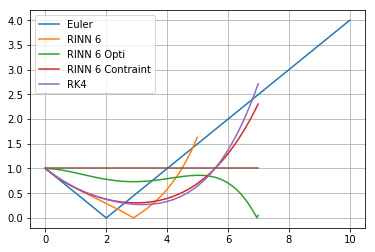

In [31]:
length_h = 700

plt.plot(hi[:],gainE[:],label = 'Euler')
plt.plot(hi[:500],gain[:500],label = 'RINN 6')
plt.plot(hi[:length_h],gain_opti[:length_h],label = 'RINN 6 Opti')
plt.plot(hi[:length_h],gain_opti_const[:length_h],label = 'RINN 6 Contraint')
plt.plot(hi[:length_h],gainRK4[:length_h],label = 'RK4')
plt.plot(hi[:length_h],np.ones_like(gainRK4[:length_h]))
plt.grid()
plt.legend()

In [32]:
dyn_mdl2.b.sum() # RK constraint respected :)

tensor(1., dtype=torch.float64, grad_fn=<SumBackward0>)

In [33]:
g

-1.70259133633903e-7*h**6 - 4.11713175384623e-6*h**5 + 0.00155825026652975*h**4 - 0.0129243286240105*h**3 + 0.114258657183262*h**2 - 0.5*h + 1.0